<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Guided Practice: Explore Python Data Visualization

_Authors: Alexander Combs (New York City), Dave Yerrington (San Francisco), and Kevin Markham (Washington, D.C.)_

In this guided practice lab you will use Pandas, Matplotlib, and Seaborn to create simple plots.

We'll cover plotting line plots, scatter plots, bar plots, and histograms, and how to manipulate the style of your plots with Matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

# not necessary in the most recent versions of Jupyter
%matplotlib inline

In [2]:
# Generate some fake data
np.random.seed(6)
df = pd.DataFrame(data=np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

In [4]:
# Read in the Boston housing data.
DATA_DIR = 'C:/Users/Ashley/Desktop/General_Assembly/Lessons/data_visualization-master/assets/data'
housing_path = f'{DATA_DIR}/boston_housing_data.csv'
housing = pd.read_csv(housing_path)

# Read in the drinks data.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters_alcohol', 'continent']
drinks_path = f'{DATA_DIR}/drinks.csv'
drinks = pd.read_csv(drinks_path, header=0, names=drink_cols, na_filter=False)

# Read in the ufo data.
ufo_path = f'{DATA_DIR}/ufo.csv'
ufo = pd.read_csv(ufo_path)
ufo.loc[:, 'Time'] = pd.to_datetime(ufo.Time)
ufo.loc[:, 'Year'] = ufo.Time.dt.year

In [19]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


The Boston housing data dictionary is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

## Plot Types

### Line plots

Use a line plot to show the trend of a numerical variable over time.

In [10]:
# Count the number of ufo reports each year and sort the result by year
ufo.loc[:,'Year'].values_count().sort_index()

AttributeError: 'Series' object has no attribute 'values_count'

In [ ]:
# Create a line plot of the number of UFO sightings over time
 report_counts.plot()

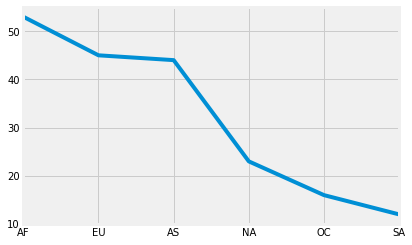

In [6]:
# Use the drinks dataset to create a line plot showing the number of countries
# per continent.
ax = drinks.loc[:,'continent'].value_counts().plot()

**Exercise (1 min.)**

- The first plot above makes sense, but the second doesn't. Why?

$\blacksquare$

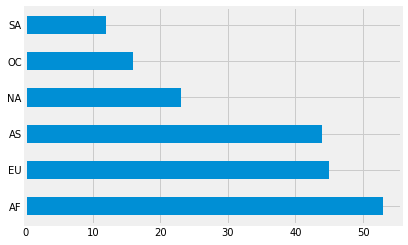

In [7]:
# Plot the same data as a (horizontal) bar plot -- a much better choice!
ax = drinks.loc[:,'continent'].value_counts().plot(kind = 'barh')

In [11]:
# Create a line plot of the columns in the generated DataFrame `df`
ax = df.plot()
ax.set_xticklabels(df.index)

SyntaxError: positional argument follows keyword argument (<ipython-input-11-125eee21e139>, line 2)

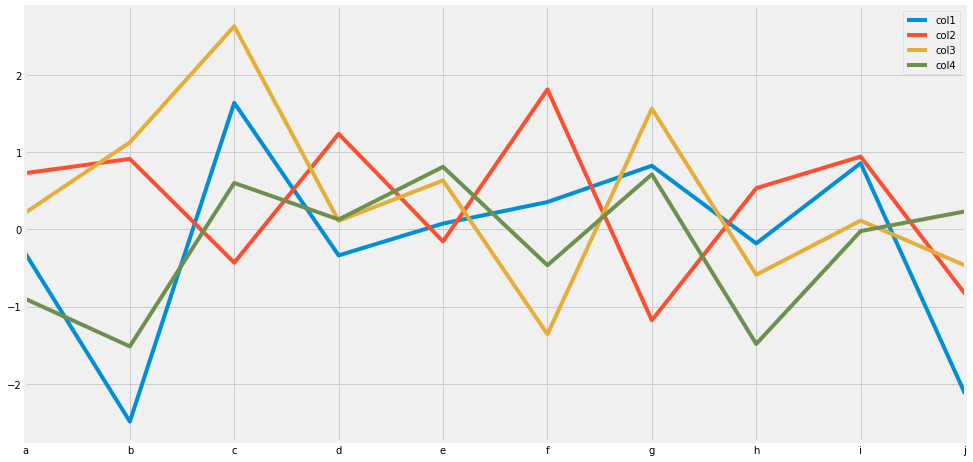

In [13]:
# Set figure size to 15in x 8in (for printing)
ax = df.plot(figsize=(15, 8))

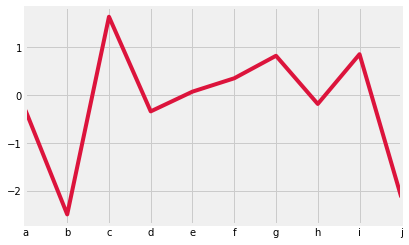

In [12]:
# Plot "col1" from `df` in crimson
ax = df.loc[:, 'col1'].plot(color='crimson')

[Matplotlib documentation on specifying colors](https://matplotlib.org/users/colors.html)

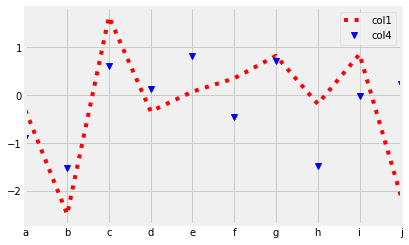

In [16]:
# Plot "col1" as a red dotted line, "col4" as disconnected downward-pointing blue triangles
# : - dotted line, v - triangle_down
# r - red, b - blue
ax = df.loc[:, ['col1', 'col4']].plot(style={'col1': ':r', 'col4': 'vb'})

**Exercise (3 mins.)**

- Create a line plot of `ZN` and `INDUS` in the housing data with the following styling:
    - For `ZN`, use a solid green line.
    - For `INDUS`, use a blue dashed line. (See https://matplotlib.org/examples/lines_bars_and_markers/line_styles_reference.html)
    - Change the figure size to a width of 12 and height of 8.

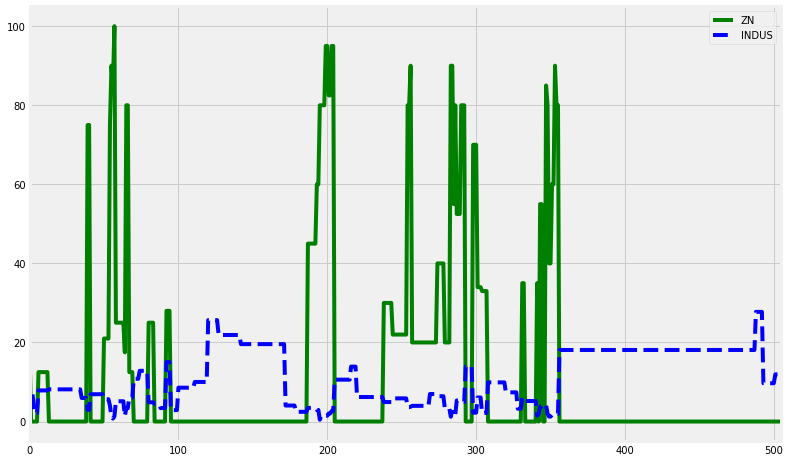

In [26]:
housing.loc[:, ['ZN', 'INDUS']].plot(style={'ZN': 'green', 'INDUS': '--b'}, figsize=(12,8))
#housing.plot(style={‘ZN’:‘green’,‘INDUS’:‘--’},figsize=(12, 8))

### Bar Plots

Use a bar plot to show a numerical comparison across different categories.

In [29]:
# Calculate the mean drink amounts for each continent by category.
mean_by_continent =drinks.groupby('continent').agg('mean')

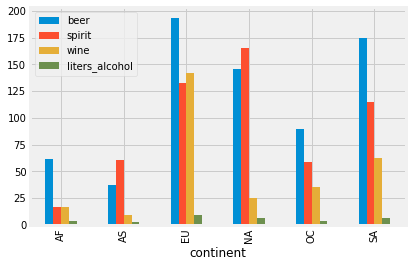

In [30]:
# Display these numbers in side-by-side bar plots
ax=mean_by_continent.plot(kind='bar')

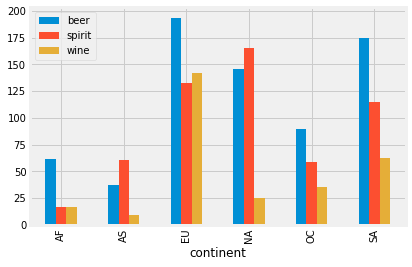

In [34]:
# Drop liters_alcohol, which is in different units
mean_by_continent =mean_by_continent.drop('liters_alcohol', axis = 'columns')
ax=mean_by_continent.plot(kind='bar')

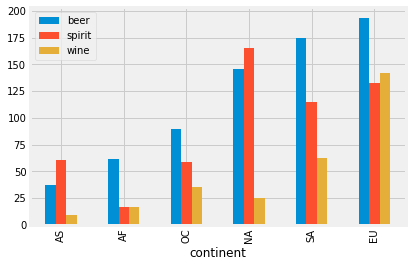

In [36]:
# Sort the continent x-axis by amount of beer consumed.
ax = mean_by_continent.sort_values('beer').plot(kind = 'bar')

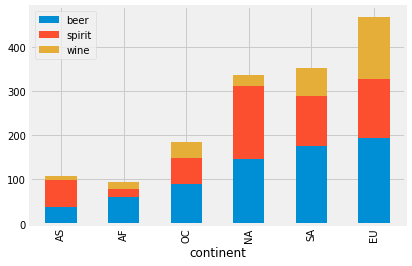

In [38]:
# Show the numbers for beer, wine, and spirits in a stacked bar plot
ax = mean_by_continent.sort_values('beer').plot(kind = 'bar', stacked = True)

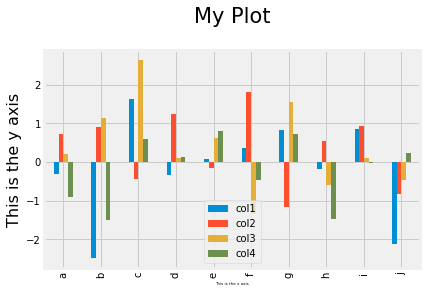

In [46]:
# Use `Axes` methods to modify our plot
ax = df.plot(kind = 'bar')
ax.set_title('My Plot', fontsize=21, y=1.1)
#ax.legend(loc=2)
ax.legend(loc='lower center')
ax.set_ylabel('This is the y axis',fontsize=16)
ax.set_xlabel('This is the x axis', fontsize = 4);

See the [legend() docs](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend) for information about `loc`.

**Exercise (4 mins.)**

- Create a bar chart using `col1` and `col2` and style it as follows:
    - Give the plot a large title of your choosing. 
    - Move the legend to the lower-left corner.

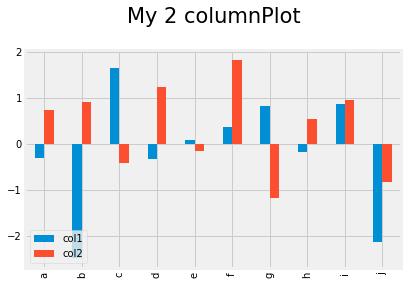

In [52]:
ax = df.loc[:,['col1', 'col2']].plot(kind = 'bar')
ax.set_title('My 2 columnPlot', fontsize=21, y=1.1)
ax.legend(loc='lower left');
#ax.set_ylabel('This is the y axis',fontsize=16)
#ax.set_xlabel('This is the x axis', fontsize = 4);

- Do the same thing but with horizontal bars and with the legend in the upper-right corner.

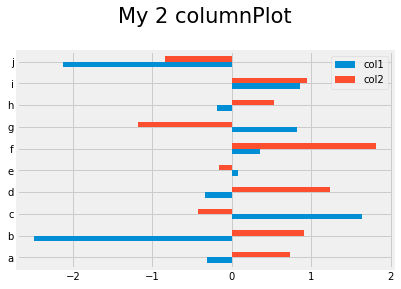

In [53]:
ax = df.loc[:,['col1', 'col2']].plot(kind = 'barh')
ax.set_title('My 2 columnPlot', fontsize=21, y=1.1)
ax.legend(loc='upper right');

- Make a stacked horizontal bar chart from `df`.

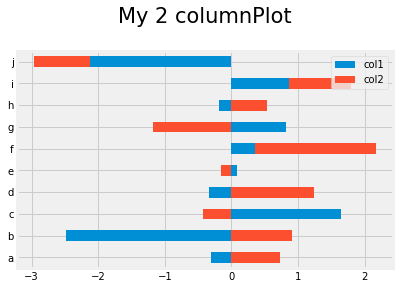

In [54]:
ax = df.loc[:,['col1', 'col2']].plot(kind = 'barh',stacked=True)
ax.set_title('My 2 columnPlot', fontsize=21, y=1.1)
ax.legend(loc='upper right');

$\blacksquare$

### Histograms

Use a histogram to show the distribution of a numerical variable.

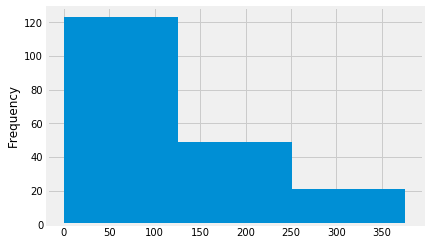

In [56]:
# Plot sorted values for the beer column
ax = drinks.loc[:,'beer'].plot(kind = 'hist', bins=3)

**Exercise (1 min.)** What information does the plot above provide?

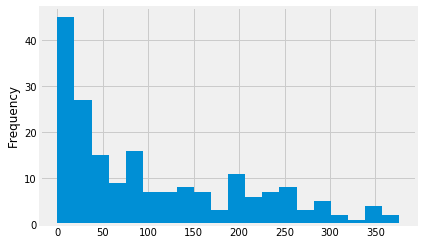

In [59]:
# Try more bins
ax = drinks.loc[:,'beer'].plot(kind = 'hist', bins=20)

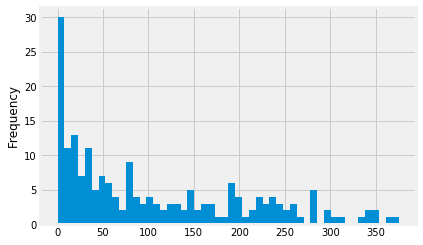

In [60]:
# Try even more bins
ax = drinks.loc[:,'beer'].plot(kind = 'hist', bins=50)

It often takes some experimentation to find a good bincount for a given variable.

**Exercise (1 min.)**

- Create a histogram with pandas for `MEDV` in the housing data, choosing a bincount that is neither too coarse nor too fine.

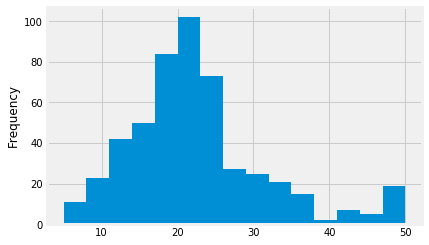

In [66]:
ax = housing.loc[:,'MEDV'].plot(kind = 'hist', bins=15)

$\blacksquare$

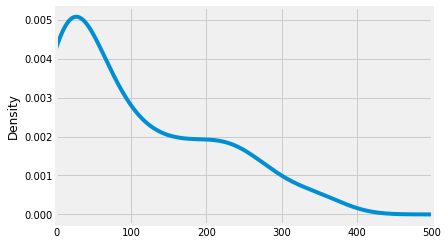

In [69]:
# Another option: density plot (smooth version of a histogram).
ax = drinks.loc[:,'beer'].plot(kind = 'density', xlim=(0,500))

,country,beer,spirit,wine,liters_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


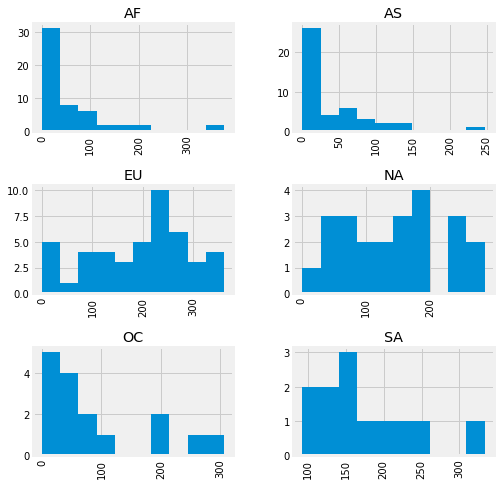

In [76]:
# Use `by` argument to `hist` function to make a histogram of beer servings for ech continent
ax = drinks.hist(column = 'beer', by= 'continent', figsize = (8,8))


**Exercise (1 min.)**

How are the histograms above potentially misleading?

$\blacksquare$

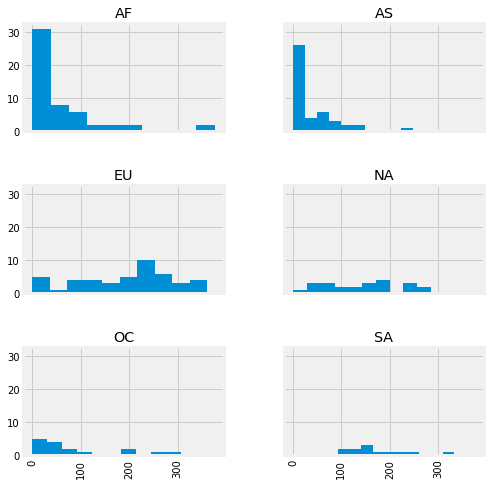

In [77]:
# Share the x- and y-axes.
ax = drinks.hist(column = 'beer', by= 'continent', figsize = (8,8),sharex = True, sharey=True)


### Box Plots

Use a boxplot to quickly summarize a distribution.

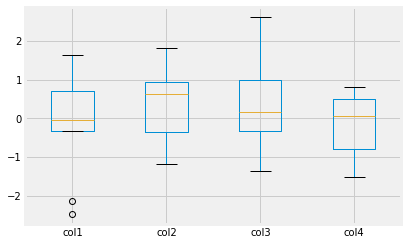

In [78]:
ax = df.plot(kind='box')

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

Looking at the 25th and 75th percentiles is similar to looking at the numbers 1 stds below and above the mean, except that the 25th and 75th percentiles "mean the same thing" regardless of how the data is distributed.

In [79]:
# Show "five-number summary" for spirit.
drinks.loc[:,'spirit'].describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

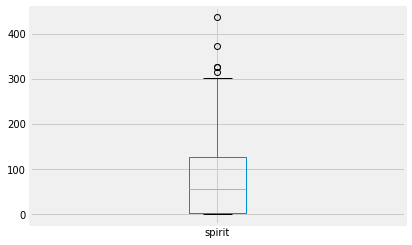

In [80]:
# Compare with box plot.
ax=drinks.loc[:,'spirit'].plot(kind='box')

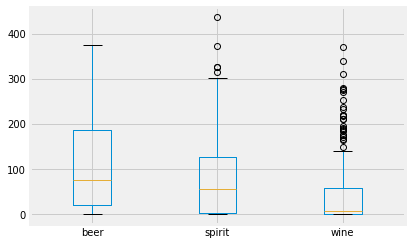

In [82]:
# Include beer, spirits, and wine.
ax=drinks.drop('liters_alcohol',axis = 'columns').plot(kind='box')

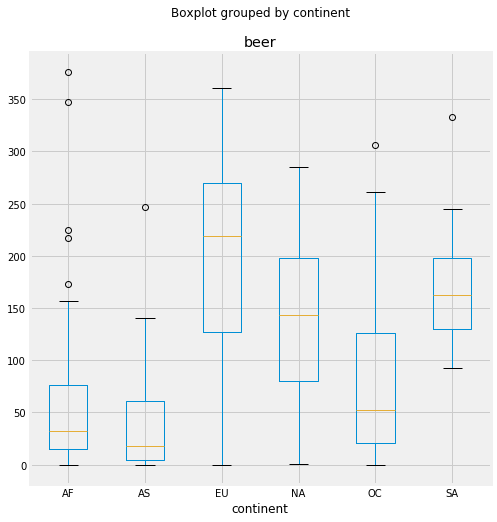

In [84]:
# Box plot of beer servings grouped by continent, using `boxplot` convenience method
ax = drinks.boxplot(column='beer', by='continent', figsize=(8,8))

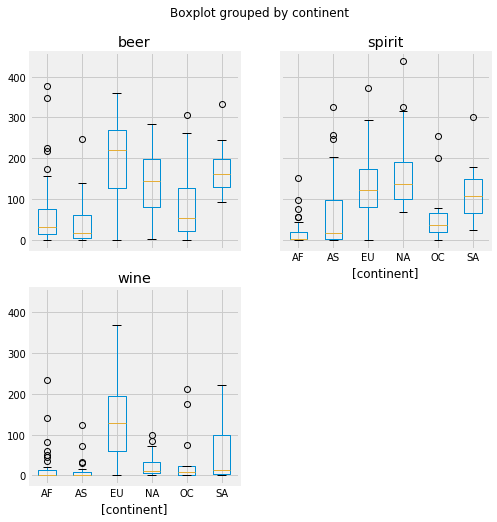

In [86]:
# Box plot of all numeric columns grouped by continent
ax = drinks.drop('liters_alcohol',axis = 'columns').boxplot( by='continent', figsize=(8,8))

### Scatter plots

Use a scatterplot to show the relationship between two numerical variables.

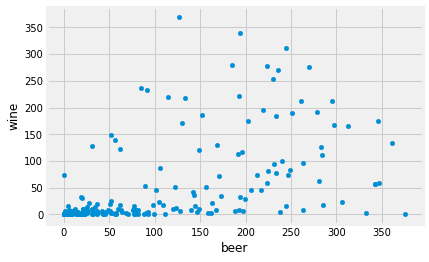

In [87]:
# Compare with scatter plot.
drinks.plot(kind='scatter', x='beer', y='wine')

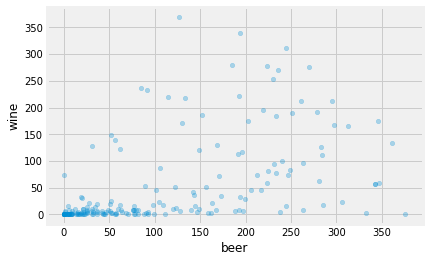

In [89]:
# Add transparency so that we can see where points overlap
drinks.plot(kind='scatter', x='beer', y='wine', alpha=.3)

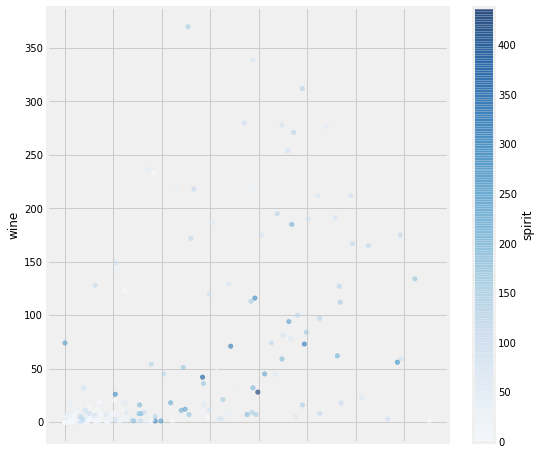

In [93]:
# Bring in a third variable: vary point color by spirit servings.
drinks.plot(kind='scatter', x='beer', y='wine', alpha=.6,c='spirit',colormap='Blues', figsize=(8,8))

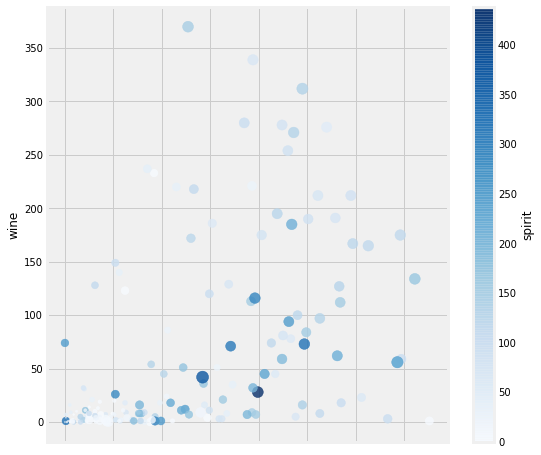

In [96]:
# Bring in a fourth variable: vary point size by total liters of alcohol.
drinks.plot(kind='scatter', x='beer', y='wine', alpha=.8,c='spirit',s=drinks.loc[:,'liters_alcohol']*10, colormap='Blues', figsize=(8,8))

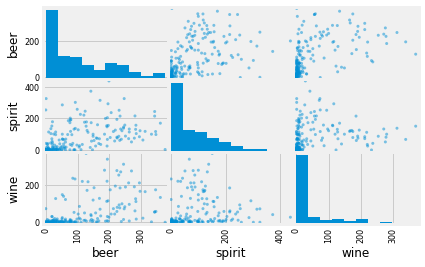

In [99]:
# Scatter matrix of three numerical columns
pd.plotting.scatter_matrix(drinks.loc[:,['beer','spirit','wine']]);

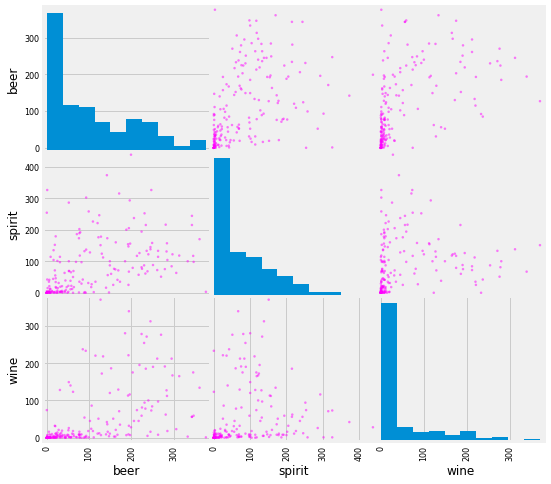

In [107]:
# Set marker size to a constant
pd.plotting.scatter_matrix(drinks.loc[:,['beer','spirit','wine']], s=25,figsize=(8,8),color='magenta');

**Exercise (5 mins.)**

- Create a scatterplot of  `INDUS` against `ZN` from the Boston housing data. Make the figure 14x8 in. with dark green size 100 markers.

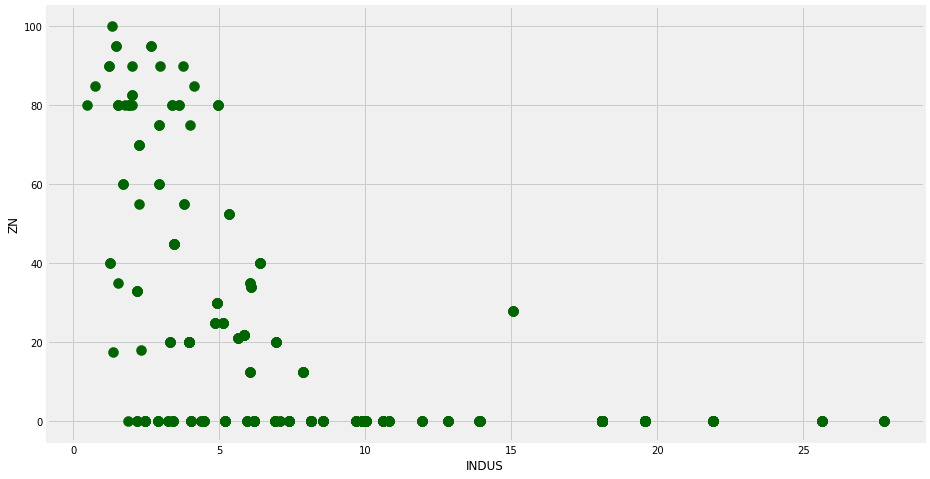

In [120]:
ax = housing.plot(kind = 'scatter', x='INDUS',y='ZN', s = 100, color='darkgreen', figsize=(14,8))

- Change the markersize to 10 times the value of the "DIS" variable.

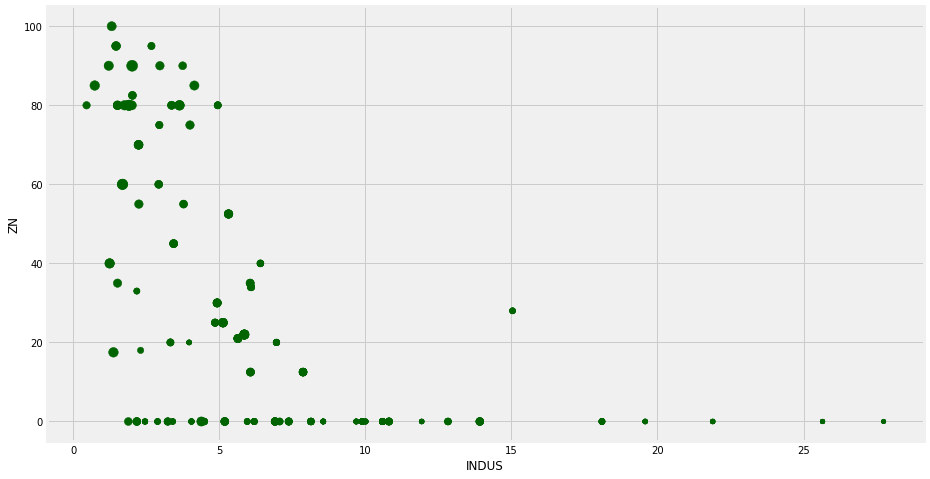

In [121]:
ax = housing.plot(kind = 'scatter', x='INDUS',y='ZN', s = housing.loc[:,'DIS']*10, color='darkgreen', figsize=(14,8))

$\blacksquare$

### Seaborn `pairplot`

Simply importing Seaborn changes the look of your plots to use a grey background with sparse gridlines. (By default, Matplotlib uses a white background with no gridlines.)

Seaborn also provides many convenience methods.

#### Compare Matplotlib `scatter_matrix` to Seaborn `pairplot`

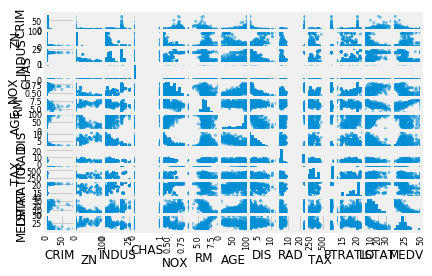

In [123]:
# scatter_matrix
axes = pd.plotting.scatter_matrix(housing)

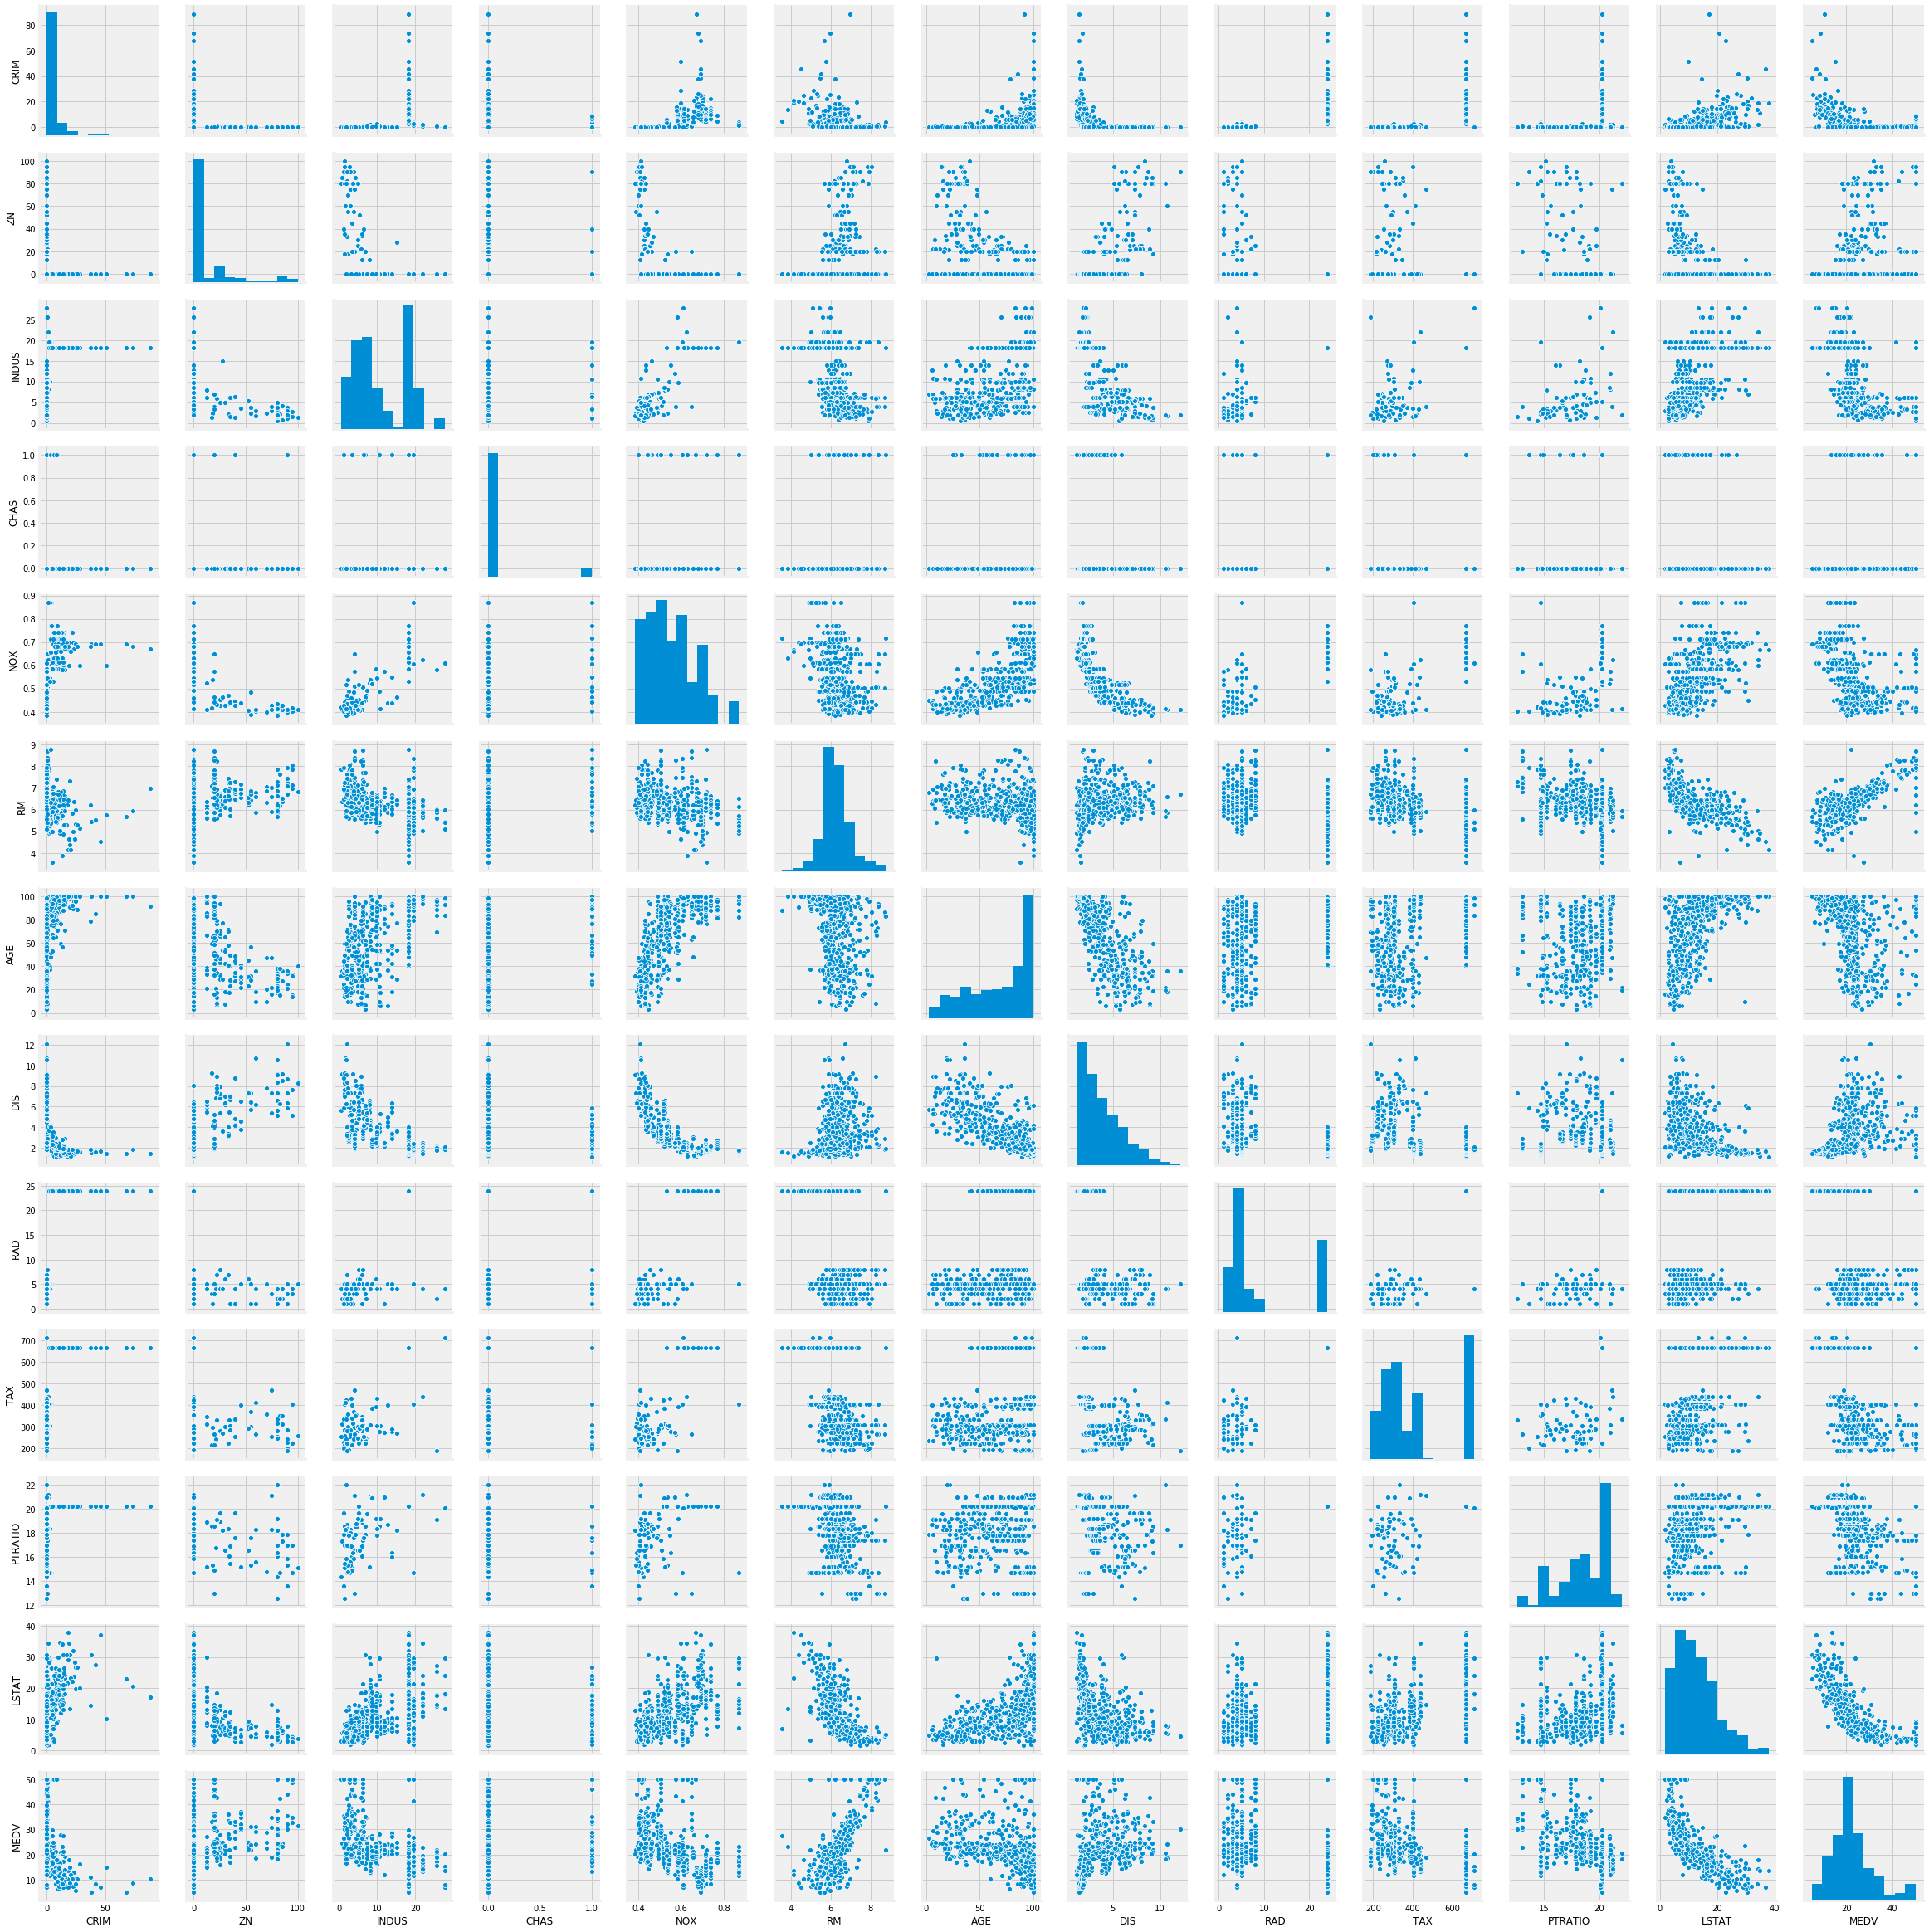

In [125]:
# pairplot
g = sns.pairplot(housing)

Seaborn is still using matplotlib under the hood, but it chooses more intelligent defaults.

### Seaborn `heatmap`

When you have too many variables, a pairplot or scatter matrix can become impossible to read. We can still gauge linear correlation using a heatmap of the correlation matrix.

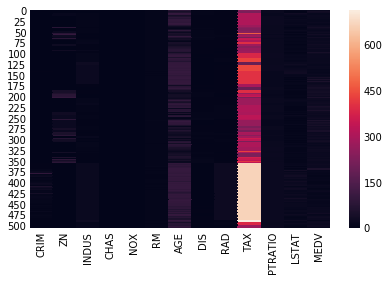

In [126]:
# Make a heatmap on the correlations between variables in the housing data:
g = sns.heatmap(housing)

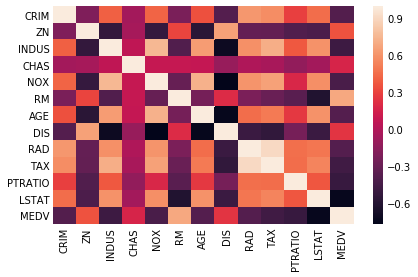

In [127]:
ax = sns.heatmap(housing.corr())

**Exercise (1 min.)**

The scale used above is not ideal. How could we improve it?

$\blacksquare$

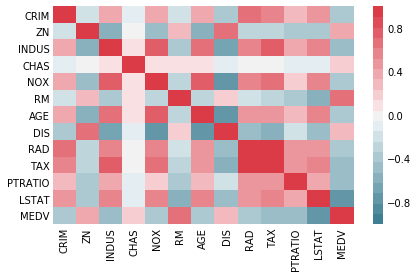

In [129]:
# Heatmap with more appropriate colorscale
ax = sns.heatmap(housing.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(220,10, n=21))

[Seaborn colormap documentation](https://seaborn.pydata.org/tutorial/color_palettes.html)

> **Aside:** The `h_neg` and `h_pos` arguments in `sns.diverging_palette` refer to hues in an HSV colorspace:

![](../assets/images/hsv_colorspace.png)

**Exercise (4 mins.)**

- Create a scatter plot of two heatmap entries that appear to have a very positive correlation.

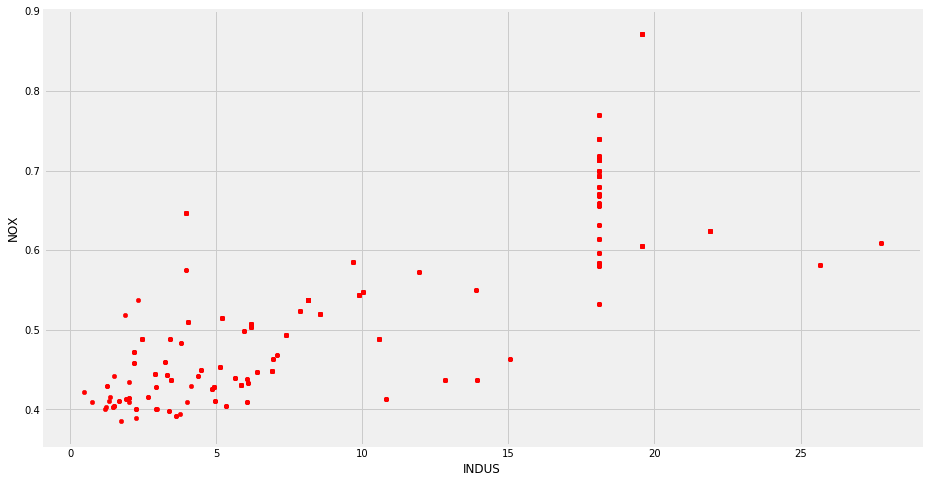

In [136]:
ax = housing.plot(kind = 'scatter', x='INDUS',y='NOX', color='red', figsize=(14,8))

- Create a scatter plot of two heatmap entries that appear to have negative correlation.

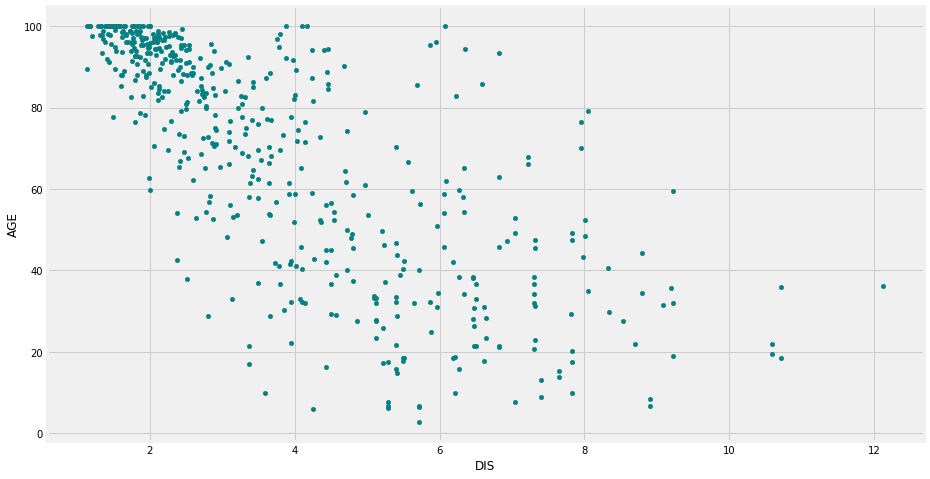

In [134]:
ax = housing.plot(kind = 'scatter', x='DIS',y='AGE', color='teal', figsize=(14,8))

## Understanding Matplotlib (Figures, Subplots, and Axes)

<img src="https://matplotlib.org/_images/anatomy.png" height="600" width="600">


From https://matplotlib.org/examples/showcase/anatomy.html

Matplotlib uses a blank canvas called a figure. Within this canvas, we can contain smaller objects, each of which is called an `Axes`.

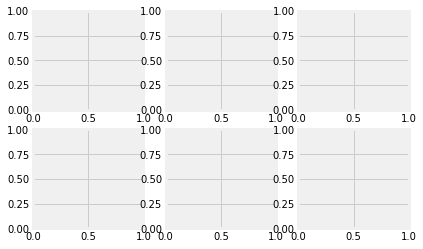

In [138]:
# Initialize figure containing 2x3 grid of `Axes` objects
fig,axes = plt.subplots(2,3)

Pandas allows us to plot to a specified axes if we pass the object to the ax parameter.

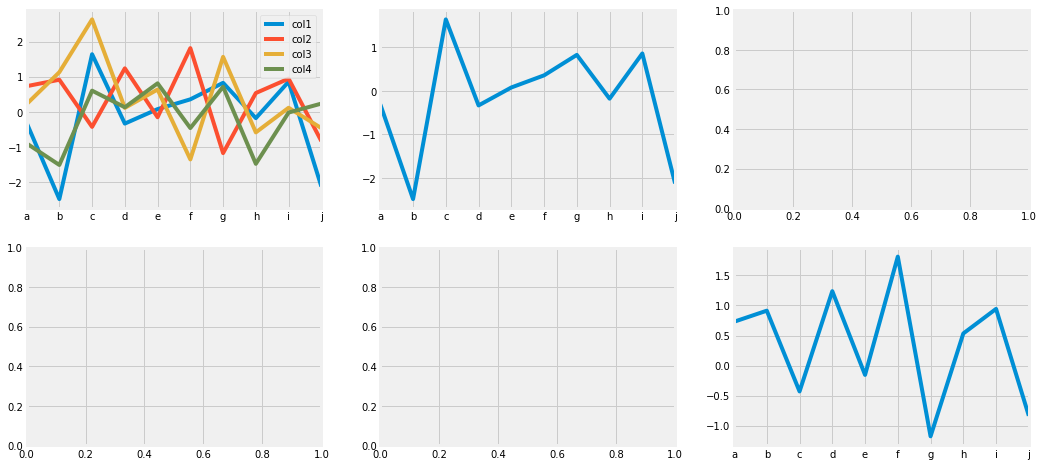

In [147]:
# Plot lines on specific axes
fig,axes = plt.subplots(2,3, figsize=(16,8))
df.plot(ax = axes[0,0])
df.loc[:,'col1'].plot(ax=axes[0,1])
df.loc[:,'col2'].plot(ax=axes[1,2])

## Summary

In this lesson, we showed examples how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

There are many ways to initialize a Matplotlib plot. For instance, we used Pandas methods, `plt.subplots`, and Seaborn. The key to working with those plots however you generate them is to get hold of the `Axes` object that holds the plot elements and then call that object's methods.